# Objectives : 

* Find time spent during day and during night
* Find time spend idle vs moving
* Find time spent on city road vs highways
* Find turns and turning speeds
* Compare performance of libraries vs raw python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/go_trackspoints.csv")

In [3]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


## 1. Time/Day analysis

* Time for day : 6am to 7pm
* Time for night : 7pm to 6am

### 1.2 Time spent driving in day vs night

In [4]:
from dateutil import parser
len(df)

18107

In [5]:
trip = 4
trip_filter = df["track_id"] == 1
df_trip = df[0:9000]
df_trip.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [6]:
# A function which takes datetime object as argument and return if the time was "day" or "night"
def day_night(dt_object):
    
    hour = dt_object.hour
    
    if(hour <= 19 and hour >= 6):
        return "day"
    else:
        return "night"

In [11]:
# Create separate dataframes for day and night data
df_day = pd.DataFrame(columns=["track_id", "latitude", "longitude", "hour"])
df_night = pd.DataFrame(columns=["track_id", "latitude", "longitude", "hour"])

for i in range(len(df_trip)):
    
    time = day_night(parser.parse(df_trip["time"].iloc[i]))
    
    if time == "day":
        hour = (parser.parse(df_trip["time"].iloc[i])).hour
        track_id = df_trip["track_id"].iloc[i]
        lat = df_trip["latitude"].iloc[i]
        long = df_trip["longitude"].iloc[i]
        df_day = df_day.append({"track_id":track_id, "latitude":lat, "longitude":long, "hour":hour}, ignore_index=True)
        
    if time == "night":
        hour = (parser.parse(df_trip["time"].iloc[i])).hour
        track_id = df_trip["track_id"].iloc[i]
        lat = df_trip["latitude"].iloc[i]
        long = df_trip["longitude"].iloc[i]
        df_night = df_night.append({"track_id":track_id, "latitude":lat, "longitude":long, "hour":hour}, ignore_index=True) 

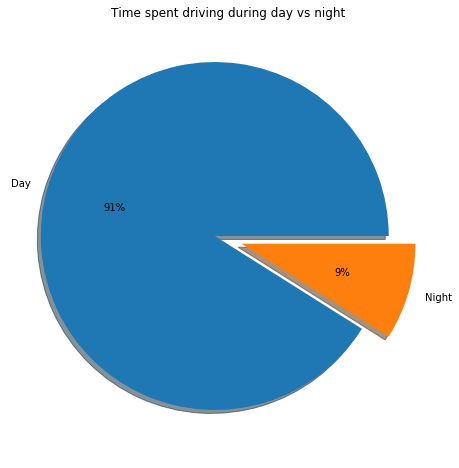

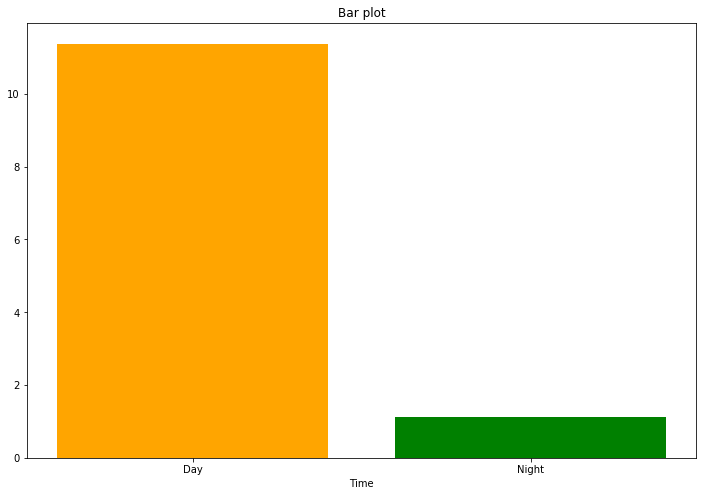

In [73]:
plt.figure(figsize=(12,8))

#plt.subplot(1,2,1)
plt.title("Time spent driving during day vs night")
plt.pie([len(df_day),len(df_night)], labels = ["Day", "Night"], shadow=True, explode=[0.08, 0.08], autopct="%1.f%%")
plt.show()

#plt.subplot(1,2,2)
plt.figure(figsize=(12,8))
plt.title("Bar plot")
hrs_day = (len(df_day)*5)/3600
hrs_night = (len(df_night)*5)/3600
plt.bar(x=[0,1],height=[hrs_day,hrs_night],tick_label=["Day", "Night"], color=("orange","green"))
plt.xlabel("Time")
plt.ylabel("Hours")
#plt.subplots_adjust(wspace=0.9)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Time spent driving during day vs night")
plt.